<a href="https://colab.research.google.com/github/muaazahmad00/Cats_and_Dogs_Recognition_Assignment/blob/master/Cats_and_Dogs_Recognition_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.34 µs


###Instructions for API Token

https://www.kaggle.com/general/74235

In [53]:
#Connecting the kaggle Token API
! pip install -q kaggle


In [16]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muaazahmadsaeed","key":"e9585d7235f9d22ea73fbf3a93530ce2"}'}

In [17]:
 ! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [18]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [19]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              234KB  2021-08-04 12:58:15          10247  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           6267  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2325  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2569  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [23]:
! kaggle competitions download -c 'Dogs-vs-cats'

 96% 259M/271M [00:04<00:00, 109MB/s] 
100% 271M/271M [00:04<00:00, 60.1MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 89.3MB/s]
 98% 534M/543M [00:03<00:00, 161MB/s]
100% 543M/543M [00:04<00:00, 137MB/s]


##Unzipping the train.zip file

In [24]:
# ! mkdir train
# ! unzip train.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/train/dog.5499.jpg  
  inflating: train/train/dog.55.jpg  
  inflating: train/train/dog.550.jpg  
  inflating: train/train/dog.5500.jpg  
  inflating: train/train/dog.5501.jpg  
  inflating: train/train/dog.5502.jpg  
  inflating: train/train/dog.5503.jpg  
  inflating: train/train/dog.5504.jpg  
  inflating: train/train/dog.5505.jpg  
  inflating: train/train/dog.5506.jpg  
  inflating: train/train/dog.5507.jpg  
  inflating: train/train/dog.5508.jpg  
  inflating: train/train/dog.5509.jpg  
  inflating: train/train/dog.551.jpg  
  inflating: train/train/dog.5510.jpg  
  inflating: train/train/dog.5511.jpg  
  inflating: train/train/dog.5512.jpg  
  inflating: train/train/dog.5513.jpg  
  inflating: train/train/dog.5514.jpg  
  inflating: train/train/dog.5515.jpg  
  inflating: train/train/dog.5516.jpg  
  inflating: train/train/dog.5517.jpg  
  inflating: train/train/dog.5518.jpg  
  inflating: train/train/dog.5519

In [27]:
!ls

drive	     sample_data	   test1.zip  train.zip
kaggle.json  sampleSubmission.csv  train


##Splitting Data

In [34]:
import os, shutil
original_dataset_dir = 'train/train'
base_dir = 'cats_and_dogs_small'

os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [35]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


##Building Network

In [37]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

###Configuring the model for training

In [41]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])


##Data preprocessing

###ImageDataGenerators

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [43]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


###Fitting the model using a batch generator

In [44]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30,
validation_data=validation_generator,
validation_steps=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 107s 1s/step - loss: 0.6871 - acc: 0.5375 - val_loss: 0.6700 - val_acc: 0.5690
Epoch 2/30
100/100 [==============================] - 106s 1s/step - loss: 0.6577 - acc: 0.6115 - val_loss: 0.6414 - val_acc: 0.6190
Epoch 3/30
100/100 [==============================] - 106s 1s/step - loss: 0.6232 - acc: 0.6600 - val_loss: 0.6230 - val_acc: 0.6680
Epoch 4/30
100/100 [==============================] - 106s 1s/step - loss: 0.5720 - acc: 0.7180 - val_loss: 0.6017 - val_acc: 0.6880
Epoch 5/30
100/100 [==============================] - 106s 1s/step - loss: 0.5321 - acc: 0.7400 - val_loss: 0.5834 - val_acc: 0.7080
Epoch 6/30
100/100 [==============================] - 106s 1s/step - loss: 0.5023 - acc: 0.7505 - val_loss: 0.5925 - val_acc: 0.6930
Epoch 7/30
100/100 [==============================] - 106s 1s/step - loss: 0.4733 - acc: 0.7770 - val_loss: 0.5927 - val_acc: 0.6810
Epoch 8/30
100/100 [==============================] - 106s 1s/step - 

In [45]:
# model.save('cats_and_dogs_small_1.h5')

In [52]:
# !cp cats_and_dogs_small_1.h5 'drive/MyDrive/DLAssignmentsDatasets/'

##Displaying curves of loss and accuracy during training

In [49]:
import matplotlib.pyplot as plt

def accuracy_graph(history):  
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

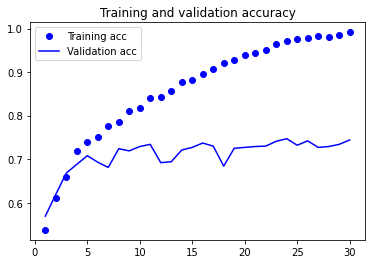

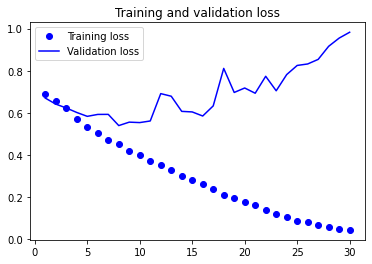

In [50]:
accuracy_graph(history)